다음 데이터 세트를 이용하여 다이아몬드 가격예측(회귀) 

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" diamonds = pd.read_csv(url) 

1. ML (RF, DT, LR) 수행

2. Dense layer만 이용 FNCC 구현

3. 순환 데이터 변환후 CNN 구현



각 단계별로 수행완료후

검사받은 이후에 다음 단계 진행



# 1. ML (RF, DT, LR) 수행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    3

C:\Users\tksmd\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


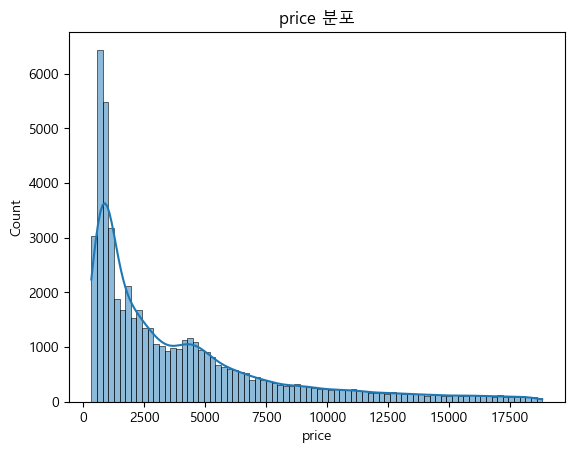

In [4]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 한글 깨짐 방지
%matplotlib inline                                   
from matplotlib import font_manager, rc                            
plt.rcParams['axes.unicode_minus'] = False                          
f_path = "c:/Windows/Fonts/malgun.ttf"                              
font_name = font_manager.FontProperties(fname=f_path).get_name()    
rc('font', family=font_name)    

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# 데이터 로드 (GitHub에서 다운로드)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" 
diamonds = pd.read_csv(url) 

# 1. EDA (탐색적 데이터 분석)
# 데이터 요약
print(diamonds.info())
print(diamonds.describe())

# 결측치 확인
print("결측치 개수:\n", diamonds.isnull().sum())

# 데이터 분포 시각화 (price 값의 분포)
sns.histplot(diamonds['price'], kde=True)
plt.title('price 분포')
plt.show()

Linear Regression 회귀 모델 성능 평가:
Mean Squared Error (MSE): 1290714.8403
R-squared (R2): 0.9203
Random Forest Regressor 회귀 모델 성능 평가:
Mean Squared Error (MSE): 344191.0154
R-squared (R2): 0.9788
Decision Tree 회귀 모델 성능 평가:
Mean Squared Error (MSE): 1612620.6648
R-squared (R2): 0.9005


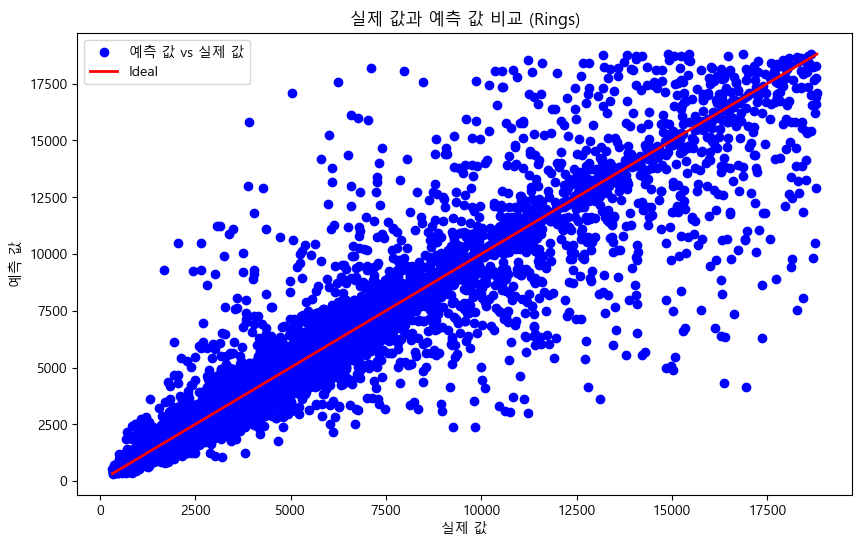

In [3]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

# 한글 깨짐 방지
%matplotlib inline                                   
from matplotlib import font_manager, rc                            
plt.rcParams['axes.unicode_minus'] = False                          
f_path = "c:/Windows/Fonts/malgun.ttf"                              
font_name = font_manager.FontProperties(fname=f_path).get_name()    
rc('font', family=font_name)    

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# 데이터 로드 (GitHub에서 다운로드)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" 
diamonds = pd.read_csv(url) 
# # 데이터 로드 (CSV 파일 경로로 로드)
# file_path = "C:/Users/tksmd/abalone.csv"
# data = pd.read_csv(file_path)

# # 1. EDA (탐색적 데이터 분석)
# # 데이터 요약
# print(diamonds.info())
# print(diamonds.describe())

# # 결측치 확인
# print("결측치 개수:\n", diamonds.isnull().sum())

# # 데이터 분포 시각화 (price 값의 분포)
# sns.histplot(diamonds['price'], kde=True)
# plt.title('price 분포')
# plt.show()

# One-hot 인코딩
diamonds = pd.get_dummies(diamonds, columns=['cut'], drop_first=True)
diamonds = pd.get_dummies(diamonds, columns=['color'], drop_first=True)
diamonds = pd.get_dummies(diamonds, columns=['clarity'], drop_first=True)

# # 상관관계 히트맵
# plt.figure(figsize=(10,8))
# sns.heatmap(diamonds.corr(), annot=True, cmap='coolwarm')
# plt.title('특성 간의 상관관계')
# plt.show()

# 2. 데이터 전처리
# X는 'price'를 제외한 나머지 특성, y는 예측할 레이블 'price'
X = diamonds.drop('price', axis=1)
y = diamonds['price']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. 회귀 모델 학습 및 평가
# 회귀 모델 초기화
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=2024),
    'Decision Tree': DecisionTreeClassifier(random_state=2024),
}

# 각 모델 학습 및 평가
for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test)
    
    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} 회귀 모델 성능 평가:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("="*60)
    
# 4. 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='예측 값 vs 실제 값')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.title('실제 값과 예측 값 비교 (Rings)')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.legend()
plt.show()

# 2. Dense layer만 이용 FNCC 구현

Epoch 1/20


C:\Users\tksmd\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 23265652.0000 - val_loss: 2769013.5000
Epoch 2/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1674110.8750 - val_loss: 1989433.5000
Epoch 3/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1200123.3750 - val_loss: 1860361.8750
Epoch 4/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1203029.3750 - val_loss: 1808280.1250
Epoch 5/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1180564.2500 - val_loss: 1755224.8750
Epoch 6/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 871948.7500 - val_loss: 1755859.8750
Epoch 7/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 843022.5625 - val_loss: 1743149.3750
Epoch 8/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 812818.4375 - val_loss: 1793443.3750
Epoch 9/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 737862.8125 - val_loss: 1834856.0000
Epoch 10/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 706664.3750 - val_loss: 1882306.8750
Epoch 11/20
10

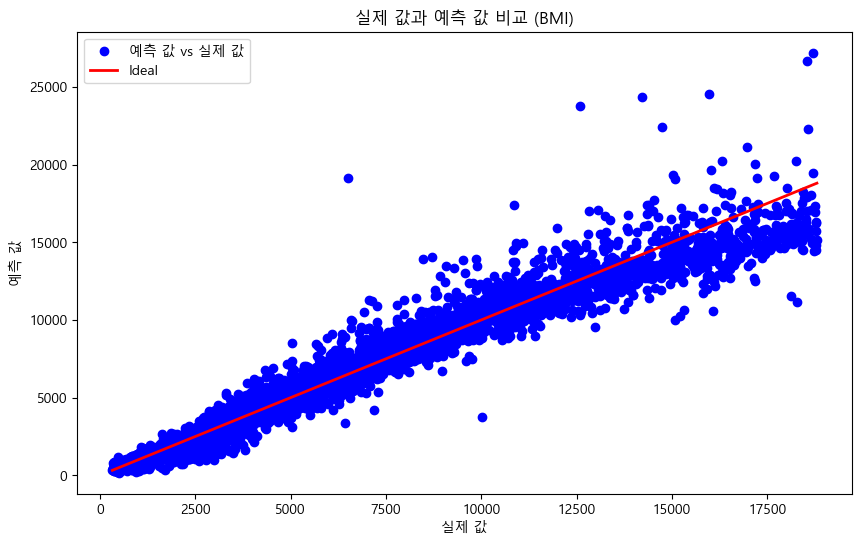

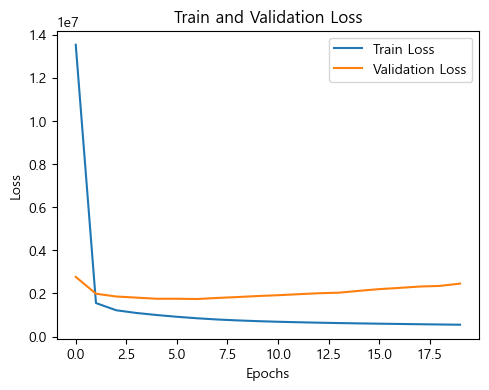

In [7]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# 한글 깨짐 방지
%matplotlib inline                                   
from matplotlib import font_manager, rc                            
plt.rcParams['axes.unicode_minus'] = False                          
f_path = "c:/Windows/Fonts/malgun.ttf"                              
font_name = font_manager.FontProperties(fname=f_path).get_name()    
rc('font', family=font_name)    

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# 데이터 로드 (GitHub에서 다운로드)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" 
diamonds = pd.read_csv(url) 

# One-hot 인코딩
diamonds = pd.get_dummies(diamonds, columns=['cut'], drop_first=True)
diamonds = pd.get_dummies(diamonds, columns=['color'], drop_first=True)
diamonds = pd.get_dummies(diamonds, columns=['clarity'], drop_first=True)

# 2. 데이터 전처리
X = diamonds.drop(['price'], axis=1)  
y = diamonds['price']  

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. 딥러닝 회귀 모델 구성 (Dense Layer 기반 신경망)
# Sequential API를 사용하여 Dense Layer 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # 출력 노드는 1개 (BMI 예측)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 4. 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"신경망 회귀 모델 성능 평가:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 5. 실제 값과 예측 값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='예측 값 vs 실제 값')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.title('실제 값과 예측 값 비교 (BMI)')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.legend()
plt.show()

# 6. 학습 곡선 시각화
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 3. 순환 데이터 변환후 CNN 구현

Epoch 1/20


C:\Users\tksmd\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 16431721.0000 - val_loss: 2083628.0000
Epoch 2/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2398424.7500 - val_loss: 1831633.8750
Epoch 3/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2280989.2500 - val_loss: 1753700.1250
Epoch 4/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2116652.0000 - val_loss: 2046901.6250
Epoch 5/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2095210.6250 - val_loss: 1829674.1250
Epoch 6/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1962517.3750 - val_loss: 1706849.7500
Epoch 7/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1922127.1250 - val_loss: 1604555.1250
Epoch 8/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1977146.1250 - val_loss: 1614943.7500
Epoch 9/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1874865.3750 - val_loss: 1653273.6250
Epoch 10/20
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1851798.5000 - val_loss: 1560254.6250
Epoch 11/

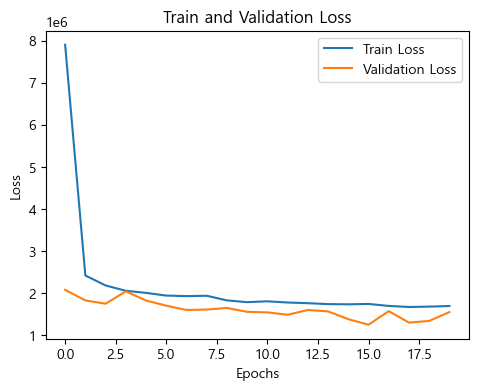

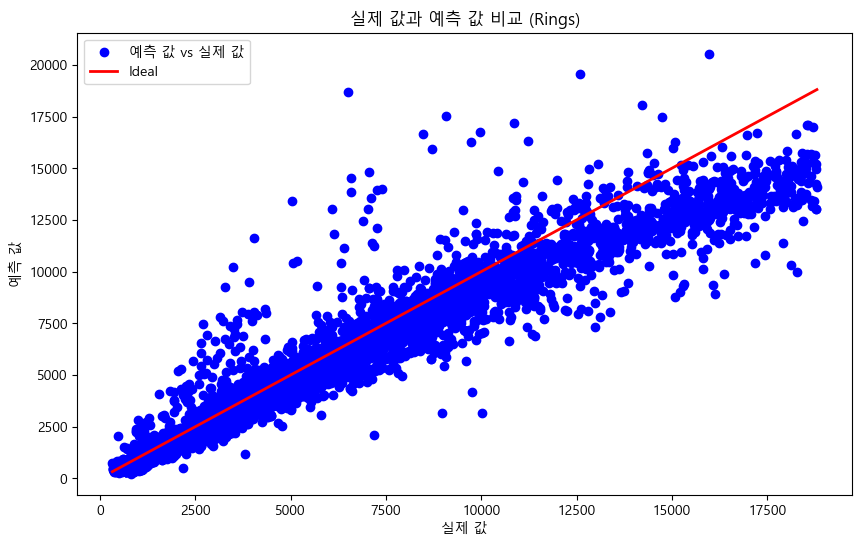

In [5]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score  # 누락된 부분 임포트

# 데이터 로드 (GitHub에서 다운로드)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" 
diamonds = pd.read_csv(url) 

# One-hot 인코딩
diamonds = pd.get_dummies(diamonds, columns=['cut'], drop_first=True)
diamonds = pd.get_dummies(diamonds, columns=['color'], drop_first=True)
diamonds = pd.get_dummies(diamonds, columns=['clarity'], drop_first=True)

# 2. 데이터 전처리 (회귀 문제)
X = diamonds.drop('price', axis=1)
y = diamonds['price']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# CNN 모델에서 1D 입력을 필요로 하므로 차원을 추가
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# 3. CNN 회귀 모델 구성 (1D Convolution 사용)
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  # 회귀 문제이므로 출력 노드는 1개 (활성화 함수 없음)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# 4. 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"CNN 회귀 모델 성능 평가:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# 5. 학습 곡선 시각화 (기존과 동일)
plt.figure(figsize=(12, 4))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 6. 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='예측 값 vs 실제 값')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal')
plt.title('실제 값과 예측 값 비교 (Rings)')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.legend()
plt.show()